 **Juliana de Carvalho Camargo**

---

In [1]:
import pandas as pd
import numpy as np
import pickle as pickl
import matplotlib.pyplot as plt
!pip3 install pickle5
import pickle5 as pickl
from scipy.optimize import fsolve

# Trabalho. PPGEQ. Termodinâmica. Bolha e Orvalho


Considere os dados de ELV apresentados por Susial et al. (2011) (Braz. J. Chem. Eng. 28 (2) • June 2011 • https://doi.org/10.1590/S0104-6632201100020001) para a mistura metilacetato+etanol.


1- Realize os cálculos indicados abaixo para a mistura metilacetato+etanol aplicando 3 modelagens diferentes:

i- Lei de Raoult

ii- Lei de Rauolt modificada com a equação NRLT para representar a não-idealidade da fase líquida

iii- Modelagem gama-phi completa com a equação NRLT para representar a não-idealidade da fase líquida e a equação do Virial truncada no segundo termo para representar a não-idealidade da fase vapor


a) Calcule o ponto de bolha para uma mistura com 30% (base molar ) de metilacetato em etanol a 350 K

b) Calcule o ponto de orvalho para uma mistura com 30% (base molar ) de metilacetato em etanol a 350 K

c) Calcule o ponto de bolha para uma mistura com 30% (base molar ) de metilacetato em etanol a 7 bar

d) Calcule o ponto de orvalho para uma mistura com 30% (base molar ) de metilacetato em etanol a 7 bar


2- Apresente diagramas de temperatura versus composição para o ELV da mistura metilacetato+etanol nas pressões de 1, 3 e 7 bar. Aplique as 3 modelagens indicadas no problema acima. Compare os dados obtidos com os resultados reportados por Susial et al. (2011).]

metilacetato (1)

etanol (2)

# letra a) Calcule o ponto de bolha para uma mistura com 30% (base molar ) de metilacetato em etanol a 350 K (bolha P)

Pressão de saturação se calcula pela equação de antoine, f(T).

In [2]:
x1 = 0.3 #(base molar)
x2 = 1-x1 #(base molar)
T = 350 #K

### Calculando Psat para metilacetato+etanol

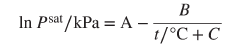

In [3]:
P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
print("P1_sat é", P1_sat, "kPa")
print("P2_sat é", P2_sat, "kPa")

P1_sat é 193.65982415430452 kPa
P2_sat é 96.01755047204718 kPa


## Pela lei de raoult

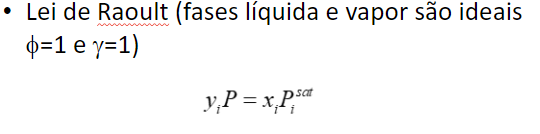

P será o somatorio das pressoes parciais relacionadas a pressão de saturação

P = x1 * P1_sat +x2 * P2_sat

In [4]:
P_raoult = x1*P1_sat +x2*P2_sat
P_raoult

125.31023257672437

In [5]:
y1_raoult = x1 * P1_sat/P_raoult
y1_raoult

0.4636329057223592

In [6]:
y2_raoult = 1- y1_raoult
y2_raoult

0.5363670942776408

In [7]:
letra_a1 = [T, x1,x2, P_raoult, y1_raoult, y2_raoult, 1, 1, 1,1]
letra_a1

[350,
 0.3,
 0.7,
 125.31023257672437,
 0.4636329057223592,
 0.5363670942776408,
 1,
 1,
 1,
 1]

In [8]:
print("a resposta é:", "T=", T, "K, ", "x1=",x1,"(base molar), ","x2=", x2,"(base molar), ","P=",P_raoult,"kPa, ", "y1=", y1_raoult, "(base molar).")

a resposta é: T= 350 K,  x1= 0.3 (base molar),  x2= 0.7 (base molar),  P= 125.31023257672437 kPa,  y1= 0.4636329057223592 (base molar).


## Lei de Roult modificada

metilacetato (1)

etanol (2)

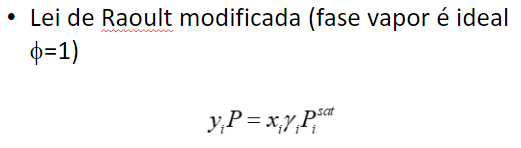

### Coeficiente de atividade (NRTL)

Para calcular coeficiente de atividade utilizando o NRTL apartir de dados retirados do simulador coco.

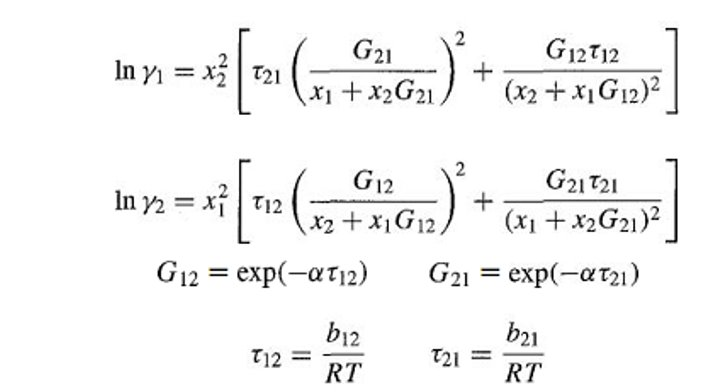

α_12 = α_21 = 0,3013

b_12= 788,432295287 J/mol

b_21= 661,563517915 J/mol

R = 8,314 J/mol*K

In [9]:
x1 = 0.3 #(base molar)
x2 = 1-x1 #(base molar)
T = 350 #K

In [10]:
a= 0.3013
b_12= 788.432295 #J/mol
b_21= 661.5635179 #J/mol
R = 8.314 #J/mol*K

In [11]:
t_12= b_12/(R*T)
t_21= b_21/(R*T)
G_12= np.exp(-a*t_12)
G_21= np.exp(-a*t_21)
gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
print("gama 1 =", gama_1, ", gama_2= ", gama_2)

gama 1 = 1.265073995937821 , gama_2=  1.0436566110496661


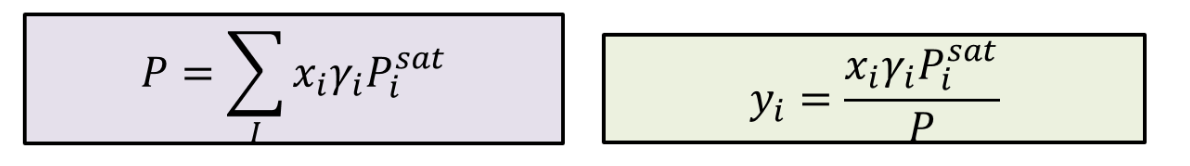


In [12]:
P_raoult_modificada = x1*gama_1*P1_sat + x2*gama_2*P2_sat
P_raoult_modificada

143.64474820751343

In [13]:
y1_raoult_modificada= x1*gama_1*P1_sat/P_raoult_modificada
y1_raoult_modificada

0.5116664771654085

In [14]:
y2_raoult_modificada = 1- y1_raoult_modificada
y2_raoult_modificada

0.4883335228345915

In [15]:
letra_a2 = [T, x1,x2, P_raoult_modificada, y1_raoult_modificada, y2_raoult_modificada, gama_1, gama_2, 1, 1]
letra_a2

[350,
 0.3,
 0.7,
 143.64474820751343,
 0.5116664771654085,
 0.4883335228345915,
 1.265073995937821,
 1.0436566110496661,
 1,
 1]

In [16]:
print("a resposta é:", "T=", T, "K, ", "x1=",x1,"(base molar), ", "P=",P_raoult_modificada,"kPa, ", "y1=", y1_raoult_modificada, "(base molar).")

a resposta é: T= 350 K,  x1= 0.3 (base molar),  P= 143.64474820751343 kPa,  y1= 0.5116664771654085 (base molar).


## Modelo gama-phi

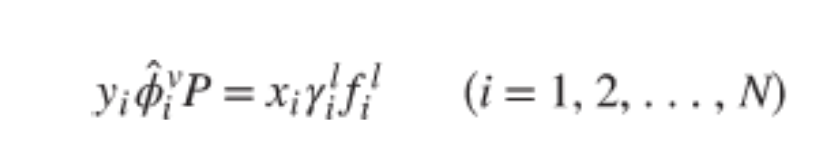

Já sabemos Pressão de saturação e coeficiente de atividade (gama) das espécies.

O phi calcularei por virial.

  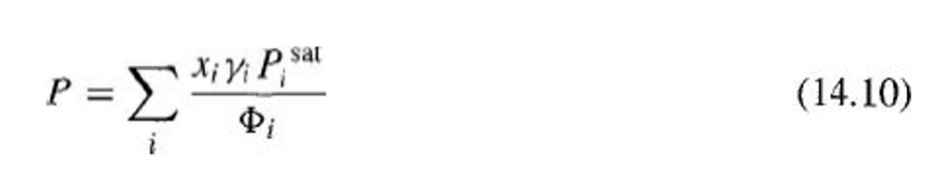

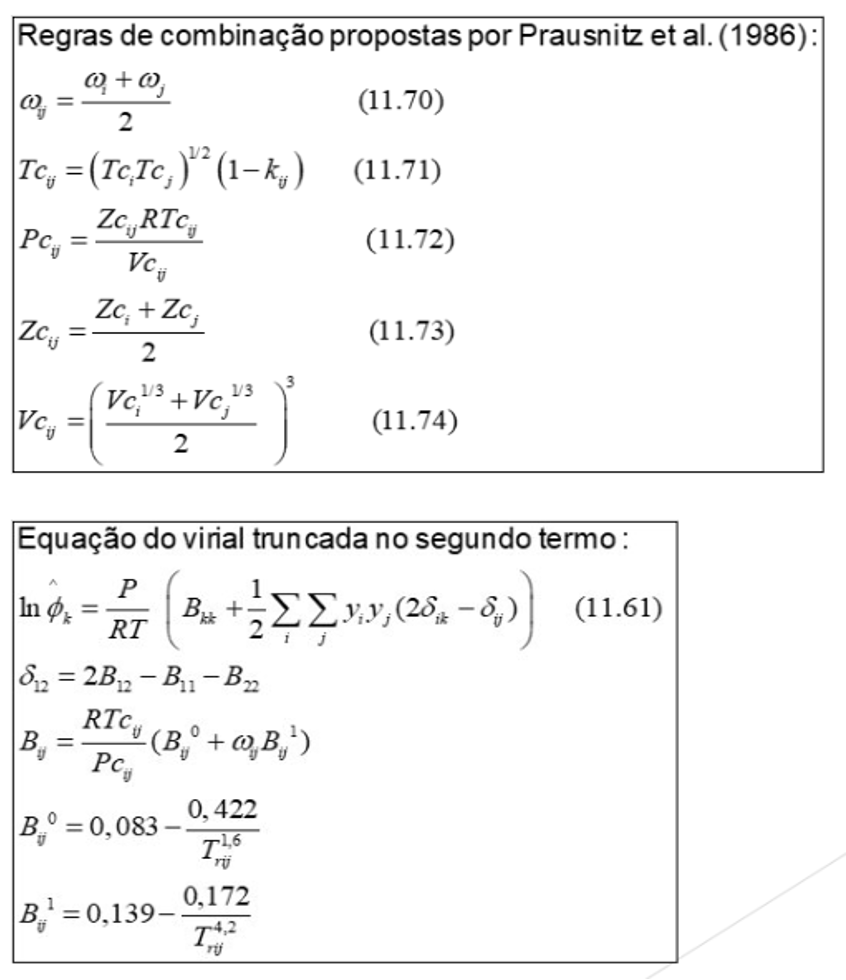

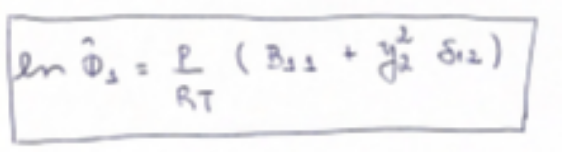

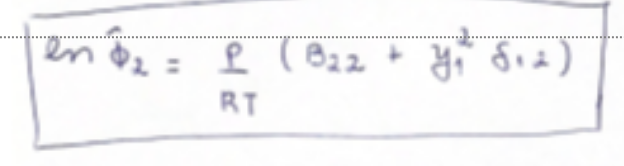

In [17]:
def bolhaP_gama_phi(x1,T, P1_sat, P2_sat, gama_1, gama_2, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2):
  x2=1-x1
  #Chutes iniciais
  phi_1= 1
  phi_2= 1
  P= P1_sat
  y1= 0.5
  y2=0.5
  P_antigo = 0.1
  while abs(P-P_antigo)>= 0.00001:
        P_antigo = P
        #Calculo do phi_1 e phi_2 com virial
        R= 83.14 #bar cmˆ3/mol K
        w_12= (w_1+w_2)/2
        Tc_12=(Tc_1*Tc_2)**(1/2)
        Zc_12= (Zc_1+Zc_2)/2
        Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
        Pc_12=Zc_12*R*Tc_12/Vc_12
        Tr_1=T/Tc_1
        Tr_2=T/Tc_2
        Tr_12=T/Tc_12
        B0_11= 0.083-0.422/(Tr_1)**(1.6)
        B0_22= 0.083-0.422/(Tr_2)**(1.6)
        B0_12= 0.083-0.422/(Tr_12)**(1.6)
        B1_11=0.139-0.172/(Tr_1)**(4.2)
        B1_22=0.139-0.172/(Tr_2)**(4.2)
        B1_12=0.139-0.172/(Tr_12)**(4.2)
        B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
        B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
        B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
        d_12= (2*B_12-B_11-B_22)
        phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
        phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
        #calculando y1
        Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
        phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
        f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
        Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
        phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
        f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
        y1= x1*gama_1*f1_l/(phi_1 * P)
        y2= 1 - y1
        #Calculando P
        P=(x1*gama_1*f1_l/phi_1)+(x2*gama_2*f2_l/phi_2)
  return y1, P, phi_1, phi_2

metilacetato (1)

etanol (2)

In [18]:
Tc_1= 506.6 #K
Pc_1= 47.50 #bar
w_1= 0.331
Zc_1= 0.257
Vc_1=228 #cmˆ3/mol
Tc_2= 513.9 #K
Pc_2= 61.48 #bar
w_2= 0.645
Zc_2= 0.240
Vc_2= 167   #cmˆ3/mol

In [19]:
resp = bolhaP_gama_phi(x1,T, P1_sat, P2_sat, gama_1, gama_2, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2)
resp

(0.5043019544835078,
 143.55787943198118,
 0.9611273182479697,
 0.9607042088132468)

In [20]:
letra_a3 = [T, x1, x2, resp[1], resp[0], 1-resp[0], gama_1, gama_2, resp[2], resp[3]]
letra_a3

[350,
 0.3,
 0.7,
 143.55787943198118,
 0.5043019544835078,
 0.4956980455164922,
 1.265073995937821,
 1.0436566110496661,
 0.9611273182479697,
 0.9607042088132468]

In [21]:
print("a resposta é:", "T=", letra_a3[0], "K, ", "x1=",letra_a3[1],"(base molar), ", "P=",letra_a3[2],"kPa, ", "y1=", letra_a3[3], "(base molar).")

a resposta é: T= 350 K,  x1= 0.3 (base molar),  P= 0.7 kPa,  y1= 143.55787943198118 (base molar).


In [22]:
# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Letra A Raoult': letra_a1,
    'Letra A Raoult modificada': letra_a2,
    'Letra A gama-phi': letra_a3},
                  index=['T (K)', 'x1', 'x2', 'P (kPa)', 'y1', 'y2','gama 1','gama 2', 'phi 1', 'phi 2'])

# Exibindo a tabela
print(df)

         Letra A Raoult  Letra A Raoult modificada  Letra A gama-phi
T (K)        350.000000                 350.000000        350.000000
x1             0.300000                   0.300000          0.300000
x2             0.700000                   0.700000          0.700000
P (kPa)      125.310233                 143.644748        143.557879
y1             0.463633                   0.511666          0.504302
y2             0.536367                   0.488334          0.495698
gama 1         1.000000                   1.265074          1.265074
gama 2         1.000000                   1.043657          1.043657
phi 1          1.000000                   1.000000          0.961127
phi 2          1.000000                   1.000000          0.960704


In [23]:
# Limpa o ambiente
from IPython import get_ipython
get_ipython().magic('reset -sf')

# b) Calcule o ponto de orvalho para uma mistura com 30% (base molar ) de metilacetato em etanol a 350 K (Orvalho P)

In [24]:
import numpy as np

In [25]:
y1 = 0.3 #(base molar)
y2 = 1-y1 #(base molar)
T = 350 #K

## Lei de Roult

In [26]:
P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
print("P1_sat é", P1_sat, "kPa")
print("P2_sat é", P2_sat, "kPa")

P1_sat é 193.65982415430452 kPa
P2_sat é 96.01755047204718 kPa


In [27]:
P_raoult=1/((y1/P1_sat)+(y2/P2_sat))
P_raoult

113.12931348851592

In [28]:
x1_raoult=y1*P_raoult/P1_sat
x1_raoult

0.17524953456279596

In [29]:
x2_raoult= 1-x1_raoult
x2_raoult

0.824750465437204

In [30]:
letra_b1 = [T, x1_raoult,x2_raoult, P_raoult, y1, y2, 1, 1, 1,1]
letra_b1

[350,
 0.17524953456279596,
 0.824750465437204,
 113.12931348851592,
 0.3,
 0.7,
 1,
 1,
 1,
 1]

## Lei de Roult modificada

In [31]:
a= 0.3013
b_12= 788.432295287 #J/mol
b_21= 661.563517915 #J/mol
R = 8.314 #J/mol*K

In [32]:
def Raoul_modificada(y1,y2,T,P1_sat, P2_sat, a,b_12, b_21, R):
    x1=0.5
    x2=0.5
    P=1/((y1/P1_sat)+(y2/P2_sat))
    P_antigo= P2_sat
    while abs (P - P_antigo)>= 0.0001:
            P_antigo= P
            #calculo NRTL
            t_12= b_12/(R*T)
            t_21= b_21/(R*T)
            G_12= np.exp(-a*t_12)
            G_21= np.exp(-a*t_21)
            gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
            gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
            #calculo do P
            x1=y1*P/(gama_1*P1_sat)
            x2= 1-x1
            P = 1 / ((y1 / (gama_1 * P1_sat)) + (y2 / (gama_2 * P2_sat)))
    return gama_1, gama_2, P, x1, x2

In [33]:
resp = Raoul_modificada(y1,y2,T,P1_sat, P2_sat, a,b_12, b_21, R)
resp

(1.4361184599885408,
 1.0080302008636706,
 120.3234127467652,
 0.12979018349807242,
 0.8702098165019276)

In [34]:
gama_1= resp[0]
gama_1

1.4361184599885408

In [35]:
gama_2 = resp[1]
gama_2

1.0080302008636706

In [36]:
letra_b2 = [T, resp[3],resp[4], resp[2], y1, y2, resp[0], resp[1], 1, 1]
letra_b2

[350,
 0.12979018349807242,
 0.8702098165019276,
 120.3234127467652,
 0.3,
 0.7,
 1.4361184599885408,
 1.0080302008636706,
 1,
 1]

## Modelo gama-phi

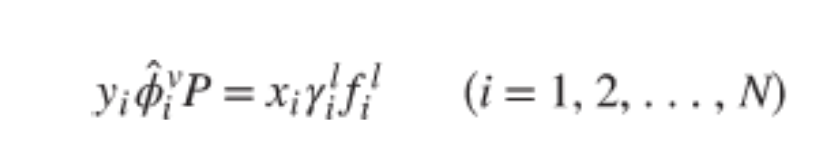

Já sabemos Pressão de saturação e coeficiente de atividade (gama) das espécies.

O phi calcularei por virial.

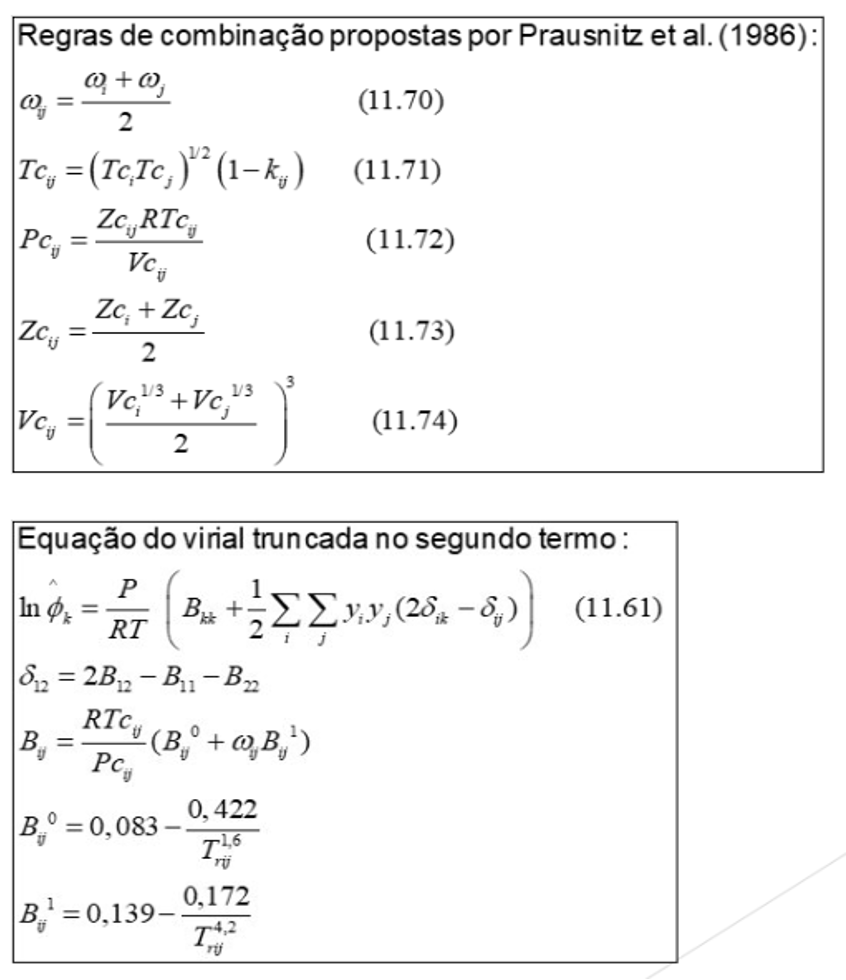

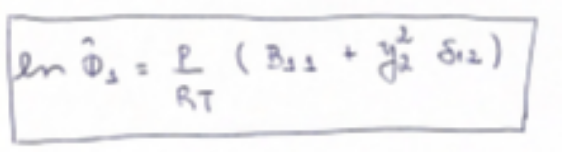

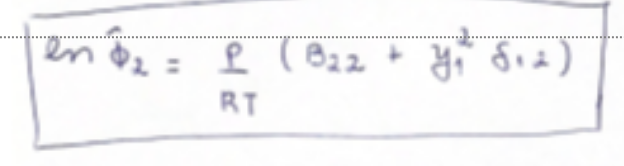

In [37]:
def orvalhoP_gama_phi(y1,T, P1_sat, P2_sat, gama_1, gama_2, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2):
  y2=1-y1
  #Chutes iniciais
  phi_1= 1
  phi_2= 1
  P= P1_sat
  x1= 0.5
  x2=0.5
  P_antigo = P2_sat
  while abs(P-P_antigo)>= 0.00001:
        P_antigo = P
        #Calculo do phi_1 e phi_2 com virial
        R= 83.14 #bar cmˆ3/mol K
        w_12= (w_1+w_2)/2
        Tc_12=(Tc_1*Tc_2)**(1/2)
        Zc_12= (Zc_1+Zc_2)/2
        Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
        Pc_12=Zc_12*R*Tc_12/Vc_12
        Tr_1=T/Tc_1
        Tr_2=T/Tc_2
        Tr_12=T/Tc_12
        B0_11= 0.083-0.422/(Tr_1)**(1.6)
        B0_22= 0.083-0.422/(Tr_2)**(1.6)
        B0_12= 0.083-0.422/(Tr_12)**(1.6)
        B1_11=0.139-0.172/(Tr_1)**(4.2)
        B1_22=0.139-0.172/(Tr_2)**(4.2)
        B1_12=0.139-0.172/(Tr_12)**(4.2)
        B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
        B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
        B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
        d_12= (2*B_12-B_11-B_22)
        phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
        phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
        #calculando x1
        Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
        phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
        f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
        Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
        phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
        f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
        x1= phi_1*P*y1/(gama_1*f1_l)
        x2= 1 - x1
        #Calculando P
        P=(x1*gama_1*f1_l/phi_1)+(x2*gama_2*f2_l/phi_2)
  return x1, P, phi_1, phi_2

metilacetato (1)

etanol (2)

In [38]:
Tc_1= 506.6 #K
Pc_1= 47.50 #bar
w_1= 0.331
Zc_1= 0.257
Vc_1=228 #cmˆ3/mol
Tc_2= 513.9 #K
Pc_2= 61.48 #bar
w_2= 0.645
Zc_2= 0.240
Vc_2= 167   #cmˆ3/mol

In [39]:
resp = orvalhoP_gama_phi(y1,T, P1_sat, P2_sat, gama_1, gama_2, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2)
resp

(0.13314423914651685,
 120.75423984552145,
 0.967067340414215,
 0.9669303845297186)

In [40]:
letra_b3 = [T, resp[0], 1-resp[0], resp[1], y1, y2, gama_1, gama_2, resp[2], resp[3]]
letra_b3

[350,
 0.13314423914651685,
 0.8668557608534831,
 120.75423984552145,
 0.3,
 0.7,
 1.4361184599885408,
 1.0080302008636706,
 0.967067340414215,
 0.9669303845297186]

In [41]:
import pandas as pd

In [42]:
# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Letra B Raoult': letra_b1,
    'Letra B Raoult modificada': letra_b2,
    'Letra B gama phi': letra_b3},
                  index=['T (K)', 'x1', 'x2', 'P (kPa)', 'y1', 'y2','gama 1','gama 2', 'phi 1', 'phi 2'])

# Exibindo a tabela
print(df)

         Letra B Raoult  Letra B Raoult modificada  Letra B gama phi
T (K)        350.000000                 350.000000        350.000000
x1             0.175250                   0.129790          0.133144
x2             0.824750                   0.870210          0.866856
P (kPa)      113.129313                 120.323413        120.754240
y1             0.300000                   0.300000          0.300000
y2             0.700000                   0.700000          0.700000
gama 1         1.000000                   1.436118          1.436118
gama 2         1.000000                   1.008030          1.008030
phi 1          1.000000                   1.000000          0.967067
phi 2          1.000000                   1.000000          0.966930


In [43]:
# Limpa o ambiente
from IPython import get_ipython
get_ipython().magic('reset -sf')

# c) Calcule o ponto de bolha para uma mistura com 30% (base molar ) de metilacetato em etanol a 7 bar (Bolha T)

## lei de raoult

In [44]:
x1=0.3
x2=1-x1
P=700 #kPa

In [45]:
import numpy as np
from scipy.optimize import fsolve

In [46]:
def raoult(x1,x2,P):
    T_inicial= 10 #graus celcius
    func = lambda T: P- (x1*np.exp(14.2456 - (2662.78/((T)+219.69)))+x2*np.exp(16.8958 - (3795.17/((T)+230.918))))
    T_solucao = fsolve(func, T_inicial)[0]
    return T_solucao

In [47]:
T_raoult=raoult(x1,x2,P)
T_raoult #graus celcius

133.37249823808966

In [48]:
P1_sat = np.exp(14.2456 - (2662.78/((T_raoult)+219.69)))
P2_sat = np.exp(16.8958 - (3795.17/((T_raoult)+230.918)))
print("P1_sat é", P1_sat, "kPa")
print("P2_sat é", P2_sat, "kPa")

P1_sat é 815.3758516568735 kPa
P2_sat é 650.5532064327685 kPa


In [49]:
y1_raoult = x1 * P1_sat/P
y1_raoult

0.34944679356723146

In [50]:
y2_raoult= 1-y1_raoult
y2_raoult

0.6505532064327686

In [51]:
letra_c1 = [T_raoult+273.15, x1,x2, P, y1_raoult, y2_raoult, 1, 1, 1,1]
letra_c1

[406.5224982380896,
 0.3,
 0.7,
 700,
 0.34944679356723146,
 0.6505532064327686,
 1,
 1,
 1,
 1]

## Lei de raoult modificada

In [52]:
a= 0.3013
b_12= 788.432295287 #J/mol
b_21= 661.563517915 #J/mol
R = 8.314 #J/mol*K

In [53]:
def Raoul_modificada(x1,x2,P,a,b_12, b_21, R):
    y1=0.5
    y2=0.5
    y1_antigo = 0.1
    T= 350
    while abs(y1-y1_antigo)>= 0.00001:
            y1_antigo= y1
            def func(T):
              #calculo NRTL
              t_12= b_12/(R*T)
              t_21= b_21/(R*(T))
              G_12= np.exp(-a*t_12)
              G_21= np.exp(-a*t_21)
              gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
              gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
              return P- (x1*gama_1*np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))+x2*gama_2*np.exp(16.8958 - (3795.17/((T-273.15)+230.918))))
            T_inicial= T #K
            T = fsolve(func, T_inicial)[0]
            #calculo do y
            P1_sat = np.exp(14.2456 - (2662.78/(T-273.15+219.69)))
            P2_sat = np.exp(16.8958 - (3795.17/(T-273.15+230.918)))
            #calculo NRTL
            t_12= b_12/(R*(T))
            t_21= b_21/(R*(T))
            G_12= np.exp(-a*t_12)
            G_21= np.exp(-a*t_21)
            gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
            gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
            y1= x1 * P1_sat*gama_1/P
            y2= 1-y1
    return T, y1,y2, gama_1, gama_2

In [54]:
resp= Raoul_modificada(x1,x2,P,a,b_12, b_21, R)
resp

(402.70709132632066,
 0.3951846883854731,
 0.604815311614527,
 1.2280102553905021,
 1.0380748846163346)

In [55]:
letra_c2 = [resp[0], x1,x2, P, resp[1], resp[2], resp[3], resp[4], 1, 1]
letra_c2

[402.70709132632066,
 0.3,
 0.7,
 700,
 0.3951846883854731,
 0.604815311614527,
 1.2280102553905021,
 1.0380748846163346,
 1,
 1]

## Modelo gama-phi

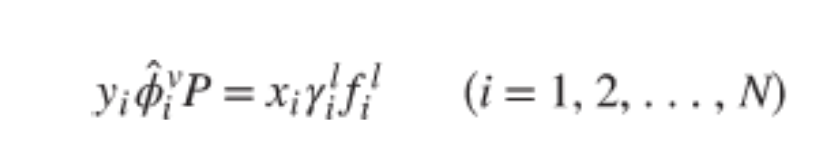

Já sabemos Pressão de saturação e coeficiente de atividade (gama) das espécies.

O phi calcularei por virial.

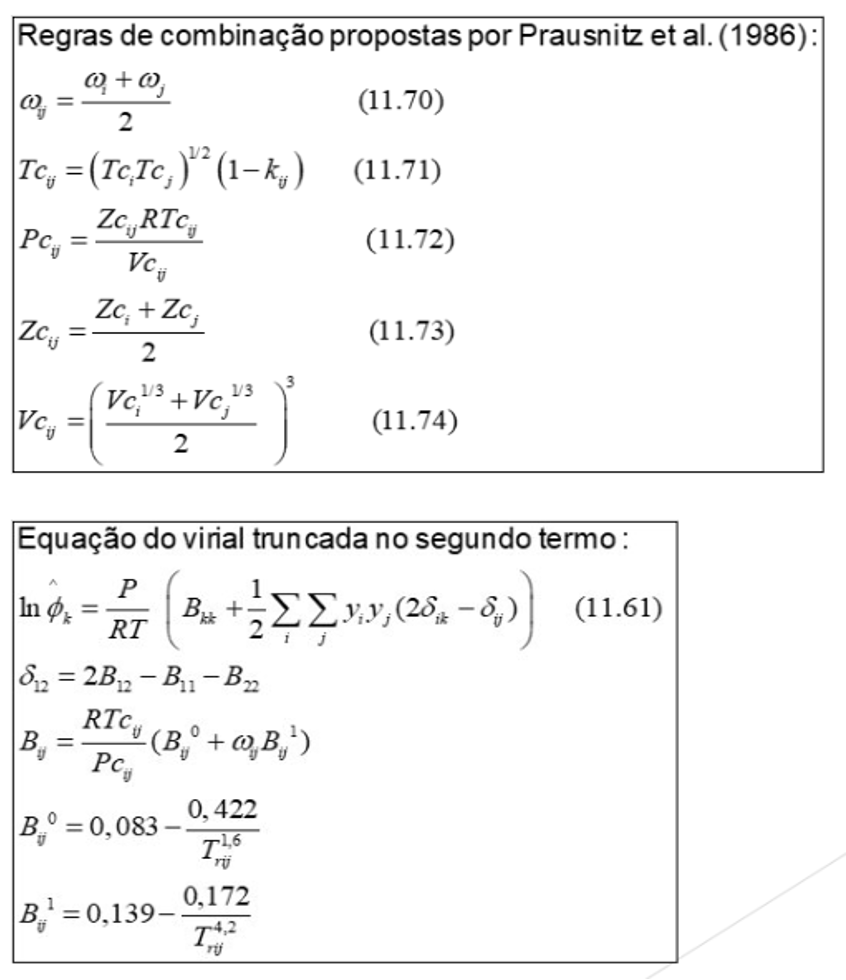

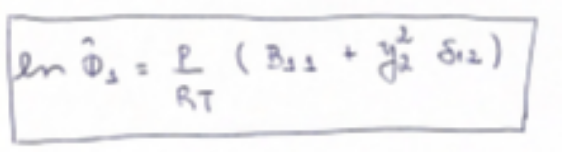

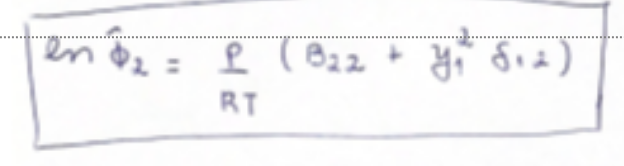

In [56]:
def bolhaT_gama_phi(x1,P, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, bb_12, bb_21):
  x2=1-x1
  #Chutes iniciais
  phi_1= 1
  phi_2= 1
  y1= 0.5
  y2=0.5
  y1_antigo=0.1
  gama_1=1
  gama_2=1
  while  abs(y1 - y1_antigo) >= 0.000000000000001:
        y1_antigo=y1
        def func(T):
              #Calculo do phi_1 e phi_2 com virial
              R= 83.14 #bar cmˆ3/mol K
              w_12= (w_1+w_2)/2
              Tc_12=(Tc_1*Tc_2)**(1/2)
              Zc_12= (Zc_1+Zc_2)/2
              Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
              Pc_12=Zc_12*R*Tc_12/Vc_12
              Tr_1=T/Tc_1
              Tr_2=T/Tc_2
              Tr_12=T/Tc_12
              B0_11= 0.083-0.422/(Tr_1)**(1.6)
              B0_22= 0.083-0.422/(Tr_2)**(1.6)
              B0_12= 0.083-0.422/(Tr_12)**(1.6)
              B1_11=0.139-0.172/(Tr_1)**(4.2)
              B1_22=0.139-0.172/(Tr_2)**(4.2)
              B1_12=0.139-0.172/(Tr_12)**(4.2)
              B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
              B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
              B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
              d_12= (2*B_12-B_11-B_22)
              phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
              phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
              #calculo NRTL do gama
              t_12= bb_12/(R*0.1*T)
              t_21= bb_21/(R*0.1*T)
              G_12= np.exp(-a*t_12)
              G_21= np.exp(-a*t_21)
              gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
              gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
              P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
              P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
              Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
              phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
              f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
              Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
              phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
              f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
              return P - (x1 * gama_1 * f1_l / (phi_1) + x2 * gama_2 * f2_l / (phi_2))
        # Cálculo do T
        T_inicial = 400
        T = fsolve(func, T_inicial)[0]
        #calculo do y
        #Calculo do phi_1 e phi_2 com virial
        R= 83.14 #bar cmˆ3/mol K
        w_12= (w_1+w_2)/2
        Tc_12=(Tc_1*Tc_2)**(1/2)
        Zc_12= (Zc_1+Zc_2)/2
        Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
        Pc_12=Zc_12*R*Tc_12/Vc_12
        Tr_1=T/Tc_1
        Tr_2=T/Tc_2
        Tr_12=T/Tc_12
        B0_11= 0.083-0.422/(Tr_1)**(1.6)
        B0_22= 0.083-0.422/(Tr_2)**(1.6)
        B0_12= 0.083-0.422/(Tr_12)**(1.6)
        B1_11=0.139-0.172/(Tr_1)**(4.2)
        B1_22=0.139-0.172/(Tr_2)**(4.2)
        B1_12=0.139-0.172/(Tr_12)**(4.2)
        B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
        B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
        B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
        d_12= (2*B_12-B_11-B_22)
        phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
        phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
        #calculo NRTL do gama
        t_12= bb_12/(R*0.1*T)
        t_21= bb_21/(R*0.1*T)
        G_12= np.exp(-a*t_12)
        G_21= np.exp(-a*t_21)
        gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
        gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
        P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
        P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
        Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
        phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
        f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
        Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
        phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
        f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
        y1= x1*gama_1*f1_l/(phi_1 * P)
        y2= 1 - y1
  return y1, T, phi_1, phi_2, gama_1, gama_2

metilacetato (1)

etanol (2)

In [57]:
Tc_1= 506.6 #K
Pc_1= 47.50 #bar
w_1= 0.331
Zc_1= 0.257
Vc_1=228 #cmˆ3/mol
Tc_2= 513.9 #K
Pc_2= 61.48 #bar
w_2= 0.645
Zc_2= 0.240
Vc_2= 167   #cmˆ3/mol

In [58]:
a= 0.3013
b_12= 788.432295287 #J/mol
b_21= 661.563517915 #J/mol

In [59]:
import numpy as np
from scipy.optimize import fsolve

In [60]:
resp = bolhaT_gama_phi(x1,P, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12,b_21)
resp

(0.38863558519335006,
 402.3125368944845,
 0.8891062807486526,
 0.8949601064540122,
 1.2282493378044517,
 1.038111360538005)

In [61]:
letra_c3 = [resp[1], x1, x2, P, resp[0], 1-resp[0], resp[4], resp[5], resp[2], resp[3]]
letra_c3

[402.3125368944845,
 0.3,
 0.7,
 700,
 0.38863558519335006,
 0.6113644148066499,
 1.2282493378044517,
 1.038111360538005,
 0.8891062807486526,
 0.8949601064540122]

In [62]:
import pandas as pd

In [63]:
# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Letra C Raoult': letra_c1,
    'Letra C Raoult modificada': letra_c2,
    'Letra C gama phi': letra_c3},
                  index=['T (K)', 'x1', 'x2', 'P (kPa)', 'y1', 'y2','gama 1','gama 2', 'phi 1', 'phi 2'])

# Exibindo a tabela
print(df)

         Letra C Raoult  Letra C Raoult modificada  Letra C gama phi
T (K)        406.522498                 402.707091        402.312537
x1             0.300000                   0.300000          0.300000
x2             0.700000                   0.700000          0.700000
P (kPa)      700.000000                 700.000000        700.000000
y1             0.349447                   0.395185          0.388636
y2             0.650553                   0.604815          0.611364
gama 1         1.000000                   1.228010          1.228249
gama 2         1.000000                   1.038075          1.038111
phi 1          1.000000                   1.000000          0.889106
phi 2          1.000000                   1.000000          0.894960


In [64]:
# Limpa o ambiente
from IPython import get_ipython
get_ipython().magic('reset -sf')

# d) Calcule o ponto de orvalho para uma mistura com 30% (base molar ) de metilacetato em etanol a 7 bar

In [65]:
y1= 0.3
y2=1-y1
P= 700 #kPa

## Lei de raoult

In [66]:
import numpy as np
from scipy.optimize import fsolve

In [67]:
def raoult(y1,y2,P):
    T_inicial= 10 #graus celcius
    func = lambda T: P-(1/((y1/np.exp(14.2456 - (2662.78/((T)+219.69))))+(y2/np.exp(16.8958 - (3795.17/((T)+230.918))))))
    T_solucao = fsolve(func, T_inicial)[0]
    return T_solucao

In [68]:
T_raoult=raoult(y1,y2,P)
T_raoult #graus celcius

133.77282061046088

In [69]:
P1_sat = np.exp(14.2456 - (2662.78/((T_raoult)+219.69)))
P2_sat = np.exp(16.8958 - (3795.17/((T_raoult)+230.918)))
print("P1_sat é", P1_sat, "kPa")
print("P2_sat é", P2_sat, "kPa")

P1_sat é 822.3704666569697 kPa
P2_sat é 658.0355366609168 kPa


In [70]:
x1_raoult= y1*P/P1_sat
x1_raoult

0.2553593648051031

In [71]:
x2_raoult= 1- x1_raoult
x2_raoult

0.7446406351948969

In [72]:
letra_d1 = [T_raoult+273.15, x1_raoult,x2_raoult, P, y1, y2, 1, 1, 1,1]
letra_d1

[406.92282061046086,
 0.2553593648051031,
 0.7446406351948969,
 700,
 0.3,
 0.7,
 1,
 1,
 1,
 1]

## Lei de Raoult modificada

In [73]:
def Raoul_modificada(y1,y2,P,a,b_12, b_21, R):
    x1=0.5
    x2=0.5
    x1_antigo = 0.1
    T= 400
    while abs(x1-x1_antigo)>= 0.000001:
            x1_antigo= x1
            def func(T):
              #calculo NRTL
              t_12= b_12/(R*(T))
              t_21= b_21/(R*(T))
              G_12= np.exp(-a*t_12)
              G_21= np.exp(-a*t_21)
              gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
              gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
              return P- (x1*gama_1*np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))+x2*gama_2*np.exp(16.8958 - (3795.17/((T-273.15)+230.918))))
            T_inicial= T #graus celcius
            T = fsolve(func, T_inicial)[0]
            #calculo do y
            P1_sat = np.exp(14.2456 - (2662.78/(T-273.15+219.69)))
            P2_sat = np.exp(16.8958 - (3795.17/(T-273.15+230.918)))
            #calculo NRTL
            t_12= b_12/(R*(T+273.15))
            t_21= b_21/(R*(T+273.15))
            G_12= np.exp(-a*t_12)
            G_21= np.exp(-a*t_21)
            gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
            gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
            x1= y1*P/(P1_sat*gama_1)
            x2= 1-x1
    return T, x1,x2, gama_1, gama_2

In [74]:
a= 0.3013
b_12= 788.432295 #J/mol
b_21= 661.5635179 #J/mol
R = 8.314 #J/mol*K

In [75]:
resp= Raoul_modificada(y1,y2,P,a,b_12, b_21, R)
resp

(403.69970731075784,
 0.23619404409258565,
 0.7638059559074144,
 1.1587537013169527,
 1.0141052055590256)

In [76]:
letra_d2 = [resp[0], resp[1],resp[2], P, y1, y2, resp[3], resp[4], 1, 1]
letra_d2

[403.69970731075784,
 0.23619404409258565,
 0.7638059559074144,
 700,
 0.3,
 0.7,
 1.1587537013169527,
 1.0141052055590256,
 1,
 1]

## Modelo gama-phi

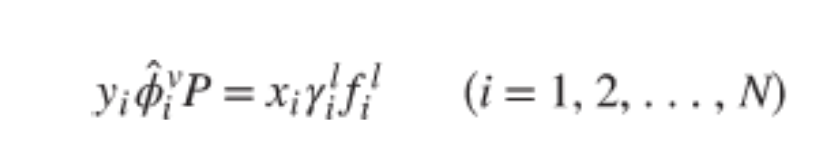

Já sabemos Pressão de saturação e coeficiente de atividade (gama) das espécies.

O phi calcularei por virial.

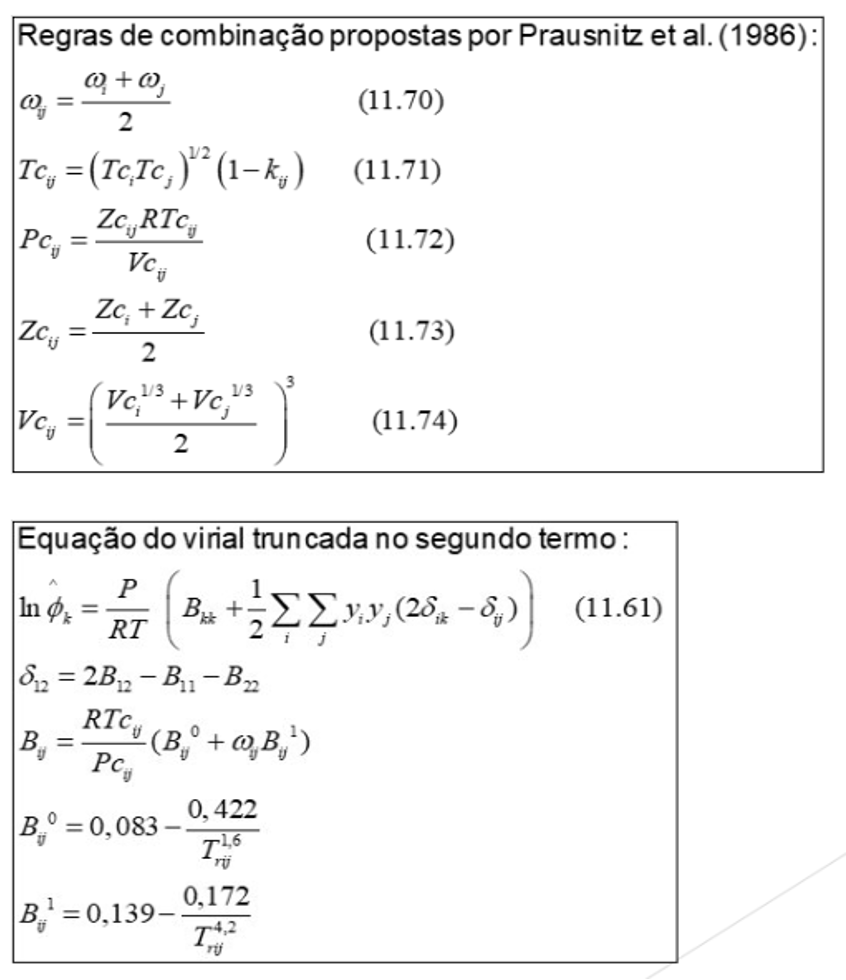

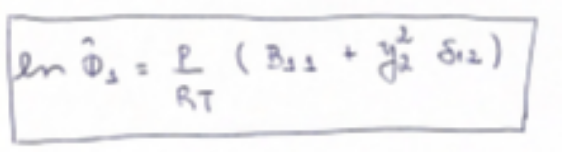

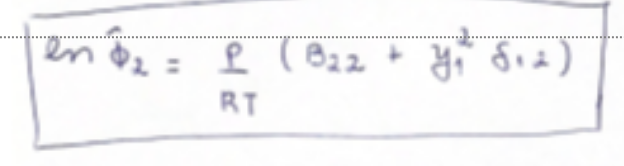

In [77]:
def orvalhoT_gama_phi(y1,P, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, bb_12, bb_21):
  y2=1-y1
  #Chutes iniciais
  phi_1= 1
  phi_2= 1
  x1= 0.5
  x2=0.5
  x1_antigo=0.1
  gama_1=1
  gama_2=1
  while  abs(x1 - x1_antigo) >= 0.000000001:
        x1_antigo=x1
        def func(T):
              #Calculo do phi_1 e phi_2 com virial
              R= 83.14 #bar cmˆ3/mol K
              w_12= (w_1+w_2)/2
              Tc_12=(Tc_1*Tc_2)**(1/2)
              Zc_12= (Zc_1+Zc_2)/2
              Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
              Pc_12=Zc_12*R*Tc_12/Vc_12
              Tr_1=T/Tc_1
              Tr_2=T/Tc_2
              Tr_12=T/Tc_12
              B0_11= 0.083-0.422/(Tr_1)**(1.6)
              B0_22= 0.083-0.422/(Tr_2)**(1.6)
              B0_12= 0.083-0.422/(Tr_12)**(1.6)
              B1_11=0.139-0.172/(Tr_1)**(4.2)
              B1_22=0.139-0.172/(Tr_2)**(4.2)
              B1_12=0.139-0.172/(Tr_12)**(4.2)
              B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
              B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
              B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
              d_12= (2*B_12-B_11-B_22)
              phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
              phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
              #calculo NRTL do gama
              t_12= bb_12/(R*0.1*T)
              t_21= bb_21/(R*0.1*T)
              G_12= np.exp(-a*t_12)
              G_21= np.exp(-a*t_21)
              gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
              gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
              P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
              P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
              Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
              phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
              f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
              Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
              phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
              f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
              return P - (x1 * gama_1 * f1_l / (phi_1) + x2 * gama_2 * f2_l / (phi_2))
        # Cálculo do T
        T_inicial = 350
        T = fsolve(func, T_inicial)[0]
        #calculo do x
        #Calculo do phi_1 e phi_2 com virial
        R= 83.14 #bar cmˆ3/mol K
        w_12= (w_1+w_2)/2
        Tc_12=(Tc_1*Tc_2)**(1/2)
        Zc_12= (Zc_1+Zc_2)/2
        Vc_12= (((Vc_1**(1/3))+(Vc_2**(1/3)))/2)**3
        Pc_12=Zc_12*R*Tc_12/Vc_12
        Tr_1=T/Tc_1
        Tr_2=T/Tc_2
        Tr_12=T/Tc_12
        B0_11= 0.083-0.422/(Tr_1)**(1.6)
        B0_22= 0.083-0.422/(Tr_2)**(1.6)
        B0_12= 0.083-0.422/(Tr_12)**(1.6)
        B1_11=0.139-0.172/(Tr_1)**(4.2)
        B1_22=0.139-0.172/(Tr_2)**(4.2)
        B1_12=0.139-0.172/(Tr_12)**(4.2)
        B_11= (R*Tc_1/Pc_1)*(B0_11+w_1*B1_11)
        B_22= (R*Tc_2/Pc_2)*(B0_22+w_2*B1_22)
        B_12= (R*Tc_12/Pc_12)*(B0_12+w_12*B1_12)
        d_12= (2*B_12-B_11-B_22)
        phi_1=np.exp((P*10**-2/(R*T))*(B_11+(d_12*(y2)**2)))
        phi_2=np.exp((P*10**-2/(R*T))*(B_22+(d_12*(y1)**2)))
        #calculo NRTL do gama
        t_12= bb_12/(R*T)
        t_21= bb_21/(R*T)
        G_12= np.exp(-a*t_12)
        G_21= np.exp(-a*t_21)
        gama_1=np.exp(x2**2*((t_21*(G_21/(x1+x2*G_21))**2)+(G_12*t_12/(x2+x1*G_12)**2)))
        gama_2=np.exp(x1**2*((t_12*(G_12/(x2+x1*G_12))**2)+(G_21*t_21/(x1+x2*G_21)**2)))
        P1_sat = np.exp(14.2456 - (2662.78/((T-273.15)+219.69)))
        P2_sat = np.exp(16.8958 - (3795.17/((T-273.15)+230.918)))
        Vl_1= Vc_1*Zc_1**(1-Tr_1)**(2/7)
        phi_sat_1= np.exp(((P1_sat*10**-2/Pc_1)/Tr_1)*(B0_11+(w_1*B1_11)))
        f1_l = phi_sat_1*P1_sat *np.exp(Vl_1 *(P- P1_sat)/100/(R*T))
        Vl_2= Vc_2*Zc_2**(1-Tr_2)**(2/7)
        phi_sat_2= np.exp(((P2_sat*10**-2/Pc_2)/Tr_2)*(B0_22+(w_2*B1_22)))
        f2_l = phi_sat_2*P2_sat*np.exp(Vl_2 *(P- P2_sat)/100/(R*T))
        x1= (phi_1 * P*y1)/(gama_1*f1_l)
        x2= 1 - x1
  return x1, T, phi_1, phi_2, gama_1, gama_2

metilacetato (1)

etanol (2)

In [78]:
Tc_1= 506.6 #K
Pc_1= 47.50 #bar
w_1= 0.331
Zc_1= 0.257
Vc_1=228 #cmˆ3/mol
Tc_2= 513.9 #K
Pc_2= 61.48 #bar
w_2= 0.645
Zc_2= 0.240
Vc_2= 167   #cmˆ3/mol

In [79]:
a= 0.3013
b_12= 788.432295287 #J/mol
b_21= 661.563517915 #J/mol

In [80]:
import numpy as np
from scipy.optimize import fsolve

In [81]:
resp = orvalhoT_gama_phi(y1,P, Tc_1, Pc_1, w_1, Zc_1, Vc_1,Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12,b_21)
resp

(0.2761020234364263,
 402.6858195866875,
 0.8893337261406512,
 0.8953925944283674,
 1.022880274129687,
 1.0032926926775285)

In [82]:
letra_d3 = [resp[1], resp[0], 1- resp[0], P, y1, y2, resp[4], resp[5], resp[2], resp[3]]
letra_d3

[402.6858195866875,
 0.2761020234364263,
 0.7238979765635737,
 700,
 0.3,
 0.7,
 1.022880274129687,
 1.0032926926775285,
 0.8893337261406512,
 0.8953925944283674]

In [83]:
import pandas as pd

In [84]:
# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Letra D Raoult': letra_d1,
    'Letra D Raoult modificada': letra_d2,
    'Letra D gama phi': letra_d3},
                  index=['T (K)', 'x1', 'x2', 'P (kPa)', 'y1', 'y2','gama 1','gama 2', 'phi 1', 'phi 2'])

# Exibindo a tabela
print(df)

         Letra D Raoult  Letra D Raoult modificada  Letra D gama phi
T (K)        406.922821                 403.699707        402.685820
x1             0.255359                   0.236194          0.276102
x2             0.744641                   0.763806          0.723898
P (kPa)      700.000000                 700.000000        700.000000
y1             0.300000                   0.300000          0.300000
y2             0.700000                   0.700000          0.700000
gama 1         1.000000                   1.158754          1.022880
gama 2         1.000000                   1.014105          1.003293
phi 1          1.000000                   1.000000          0.889334
phi 2          1.000000                   1.000000          0.895393


In [85]:
# Limpa o ambiente
from IPython import get_ipython
get_ipython().magic('reset -sf')

# 2- Apresente diagramas de temperatura versus composição para o ELV da mistura metilacetato+etanol nas pressões de 1, 3 e 7 bar. Aplique as 3 modelagens indicadas no problema acima. Compare os dados obtidos com os resultados reportados por Susial et al. (2011).]

In [86]:
import pandas as pd
import numpy as np
import pickle as pickl
import matplotlib.pyplot as plt
!pip3 install pickle5
import pickle5 as pickl
from scipy.optimize import fsolve

In [87]:
def raoult(x1_list, P):
    y1_list = []
    T_list = []

    for x1 in x1_list:
        x2 = 1 - x1
        T_inicial = 10  # graus Celsius

        # Função a ser resolvida
        func = lambda T: P - (x1 * np.exp(14.2456 - (2662.78 / (T + 219.69))) +
                              x2 * np.exp(16.8958 - (3795.17 / (T + 230.918))))

        # Resolvendo a equação para T
        T_solucao = fsolve(func, T_inicial)[0] + 273.15  # Convertendo para Kelvin
        P1_sat = np.exp(14.2456 - (2662.78 / (T_solucao - 273.15 + 219.69)))

        # Calculando y1 e y2 usando a lei de Raoult
        y1_raoult = x1 * P1_sat / P
        y1_list.append(y1_raoult)
        T_list.append(T_solucao)

    return T_list, y1_list

In [88]:
def Raoul_modificada(x1_list, P, a, b_12, b_21, R):
    T_list = []  # Lista para armazenar os valores de T
    y1_list = []  # Lista para armazenar os valores de y1

    for x1 in x1_list:
        x2 = 1 - x1
        y1 = 0.5  # Valor inicial de y1
        y1_antigo = 0.1  # Valor inicial anterior de y1
        T = 300  # Valor inicial de T em K

        while abs(y1 - y1_antigo) >= 0.00001:
            y1_antigo = y1

            def func(T):
                # Cálculo NRTL
                t_12 = b_12 / (R * T)
                t_21 = b_21 / (R * T)
                G_12 = np.exp(-a * t_12)
                G_21 = np.exp(-a * t_21)

                gama_1 = np.exp(x2**2 * ((t_21 * (G_21 / (x1 + x2 * G_21))**2) + (G_12 * t_12 / (x2 + x1 * G_12)**2)))
                gama_2 = np.exp(x1**2 * ((t_12 * (G_12 / (x2 + x1 * G_12))**2) + (G_21 * t_21 / (x1 + x2 * G_21)**2)))

                return P - (x1 * gama_1 * np.exp(14.2456 - (2662.78 / (T - 273.15 + 219.69))) +
                             x2 * gama_2 * np.exp(16.8958 - (3795.17 / (T - 273.15 + 230.918))))

            T_inicial = T  # K
            T = fsolve(func, T_inicial)[0]

            # Cálculo do y
            P1_sat = np.exp(14.2456 - (2662.78 / (T - 273.15 + 219.69)))
            P2_sat = np.exp(16.8958 - (3795.17 / (T - 273.15 + 230.918)))

            # Cálculo NRTL
            t_12 = b_12 / (R * T)
            t_21 = b_21 / (R * T)
            G_12 = np.exp(-a * t_12)
            G_21 = np.exp(-a * t_21)

            gama_1 = np.exp(x2**2 * ((t_21 * (G_21 / (x1 + x2 * G_21))**2) + (G_12 * t_12 / (x2 + x1 * G_12)**2)))
            gama_2 = np.exp(x1**2 * ((t_12 * (G_12 / (x2 + x1 * G_12))**2) + (G_21 * t_21 / (x1 + x2 * G_21)**2)))

            y1 = x1 * P1_sat * gama_1 / P
            y2 = 1 - y1

        T_list.append(T)  # Adiciona o resultado de T à lista
        y1_list.append(y1)  # Adiciona o resultado de y1 à lista

    return T_list, y1_list, y2, gama_1, gama_2

In [89]:
def bolhaT_gama_phi(x1_list, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, bb_12, bb_21):
    T_list = []  # Lista para armazenar os valores de T
    y1_list = []  # Lista para armazenar os valores de y1

    for x1 in x1_list:
        x2 = 1 - x1
        # Chutes iniciais
        phi_1 = 1
        phi_2 = 1
        y1 = 0.5
        y2 = 0.5
        y1_antigo = 0.1

        while abs(y1 - y1_antigo) >= 0.000000001:
            y1_antigo = y1

            def func(T):
                # Cálculo do phi_1 e phi_2 com virial
                R = 83.14  # bar cm³/mol K
                w_12 = (w_1 + w_2) / 2
                Tc_12 = (Tc_1 * Tc_2) ** (1/2)
                Zc_12 = (Zc_1 + Zc_2) / 2
                Vc_12 = (((Vc_1 ** (1/3)) + (Vc_2 ** (1/3))) / 2) ** 3
                Pc_12 = Zc_12 * R * Tc_12 / Vc_12
                Tr_1 = T / Tc_1
                Tr_2 = T / Tc_2
                Tr_12 = T / Tc_12
                B0_11 = 0.083 - 0.422 / (Tr_1) ** (1.6)
                B0_22 = 0.083 - 0.422 / (Tr_2) ** (1.6)
                B0_12 = 0.083 - 0.422 / (Tr_12) ** (1.6)
                B1_11 = 0.139 - 0.172 / (Tr_1) ** (4.2)
                B1_22 = 0.139 - 0.172 / (Tr_2) ** (4.2)
                B1_12 = 0.139 - 0.172 / (Tr_12) ** (4.2)
                B_11 = (R * Tc_1 / Pc_1) * (B0_11 + w_1 * B1_11)
                B_22 = (R * Tc_2 / Pc_2) * (B0_22 + w_2 * B1_22)
                B_12 = (R * Tc_12 / Pc_12) * (B0_12 + w_12 * B1_12)
                d_12 = (2 * B_12 - B_11 - B_22)
                phi_1 = np.exp((P * 10**-2 / (R * T)) * (B_11 + (d_12 * (y2)**2)))
                phi_2 = np.exp((P * 10**-2 / (R * T)) * (B_22 + (d_12 * (y1)**2)))

                # Cálculo NRTL do gama
                t_12 = bb_12 / (R*0.1 * T)
                t_21 = bb_21 / (R*0.1 * T)
                G_12 = np.exp(-a * t_12)
                G_21 = np.exp(-a * t_21)
                gama_1 = np.exp(x2**2 * ((t_21 * (G_21 / (x1 + x2 * G_21))**2) + (G_12 * t_12 / (x2 + x1 * G_12)**2)))
                gama_2 = np.exp(x1**2 * ((t_12 * (G_12 / (x2 + x1 * G_12))**2) + (G_21 * t_21 / (x1 + x2 * G_21)**2)))

                P1_sat = np.exp(14.2456 - (2662.78 / ((T - 273.15) + 219.69)))
                P2_sat = np.exp(16.8958 - (3795.17 / ((T - 273.15) + 230.918)))
                Vl_1 = Vc_1 * Zc_1 ** (1 - Tr_1) ** (2 / 7)
                phi_sat_1 = np.exp(((P1_sat * 10**-2 / Pc_1) / Tr_1) * (B0_11 + (w_1 * B1_11)))
                f1_l = phi_sat_1 * P1_sat * np.exp(Vl_1 * (P - P1_sat) / 100 / (R * T))
                Vl_2 = Vc_2 * Zc_2 ** (1 - Tr_2) ** (2 / 7)
                phi_sat_2 = np.exp(((P2_sat * 10**-2 / Pc_2) / Tr_2) * (B0_22 + (w_2 * B1_22)))
                f2_l = phi_sat_2 * P2_sat * np.exp(Vl_2 * (P - P2_sat) / 100 / (R * T))

                return P - (x1 * gama_1 * f1_l / phi_1 + x2 * gama_2 * f2_l / phi_2)

            # Cálculo do T
            T_inicial = 350
            T = fsolve(func, T_inicial)[0]

            # Cálculo do y
            # Repetição dos cálculos para obter y1 e y2
            R = 83.14  # bar cm³/mol K
            w_12 = (w_1 + w_2) / 2
            Tc_12 = (Tc_1 * Tc_2) ** (1/2)
            Zc_12 = (Zc_1 + Zc_2) / 2
            Vc_12 = (((Vc_1 ** (1/3)) + (Vc_2 ** (1/3))) / 2) ** 3
            Pc_12 = Zc_12 * R * Tc_12 / Vc_12
            Tr_1 = T / Tc_1
            Tr_2 = T / Tc_2
            Tr_12 = T / Tc_12
            B0_11 = 0.083 - 0.422 / (Tr_1) ** (1.6)
            B0_22 = 0.083 - 0.422 / (Tr_2) ** (1.6)
            B0_12 = 0.083 - 0.422 / (Tr_12) ** (1.6)
            B1_11 = 0.139 - 0.172 / (Tr_1) ** (4.2)
            B1_22 = 0.139 - 0.172 / (Tr_2) ** (4.2)
            B1_12 = 0.139 - 0.172 / (Tr_12) ** (4.2)
            B_11 = (R * Tc_1 / Pc_1) * (B0_11 + w_1 * B1_11)
            B_22 = (R * Tc_2 / Pc_2) * (B0_22 + w_2 * B1_22)
            B_12 = (R * Tc_12 / Pc_12) * (B0_12 + w_12 * B1_12)
            d_12 = (2 * B_12 - B_11 - B_22)
            phi_1 = np.exp((P * 10**-2 / (R * T)) * (B_11 + (d_12 * (y2)**2)))
            phi_2 = np.exp((P * 10**-2 / (R * T)) * (B_22 + (d_12 * (y1)**2)))

            # Cálculo NRTL do gama
            t_12 = bb_12 / (R*0.1 * T)
            t_21 = bb_21 / (R*0.1 * T)
            G_12 = np.exp(-a * t_12)
            G_21 = np.exp(-a * t_21)
            gama_1 = np.exp(x2**2 * ((t_21 * (G_21 / (x1 + x2 * G_21))**2) + (G_12 * t_12 / (x2 + x1 * G_12)**2)))
            gama_2 = np.exp(x1**2 * ((t_12 * (G_12 / (x2 + x1 * G_12))**2) + (G_21 * t_21 / (x1 + x2 * G_21)**2)))

            P1_sat = np.exp(14.2456 - (2662.78 / ((T - 273.15) + 219.69)))
            P2_sat = np.exp(16.8958 - (3795.17 / ((T - 273.15) + 230.918)))
            Vl_1 = Vc_1 * Zc_1 ** (1 - Tr_1) ** (2 / 7)
            phi_sat_1 = np.exp(((P1_sat * 10**-2 / Pc_1) / Tr_1) * (B0_11 + (w_1 * B1_11)))
            f1_l = phi_sat_1 * P1_sat * np.exp(Vl_1 * (P - P1_sat) / 100 / (R * T))
            Vl_2 = Vc_2 * Zc_2 ** (1 - Tr_2) ** (2 / 7)
            phi_sat_2 = np.exp(((P2_sat * 10**-2 / Pc_2) / Tr_2) * (B0_22 + (w_2 * B1_22)))
            f2_l = phi_sat_2 * P2_sat * np.exp(Vl_2 * (P - P2_sat) / 100 / (R * T))

            y1 = x1 * gama_1 * f1_l / (phi_1 * P)
            y2 = 1 - y1

        T_list.append(T)
        y1_list.append(y1)

    return T_list, y1_list

In [90]:
Tc_1= 506.6 #K
Pc_1= 47.50 #bar
w_1= 0.331
Zc_1= 0.257
Vc_1=228 #cmˆ3/mol
Tc_2= 513.9 #K
Pc_2= 61.48 #bar
w_2= 0.645
Zc_2= 0.240
Vc_2= 167   #cmˆ3/mol

In [91]:
a= 0.3013
b_12= 788.432295287 #J/mol
b_21= 661.563517915 #J/mol
R = 8.314 #J/mol*K

## P = 1 bar

In [92]:
x1 = [0.000, 0.038, 0.079, 0.168, 0.211,0.291, 0.335, 0.372, 0.441, 0.488,0.569, 0.643, 0.686, 0.720, 0.855, 0.874, 0.902, 0.911, 0.959, 1.000]

In [93]:
y1 = [0.000, 0.127, 0.254, 0.418, 0.496,0.577, 0.602, 0.635, 0.686, 0.703,0.738, 0.773, 0.791, 0.809, 0.874,0.892, 0.911, 0.921, 0.959, 1.000]

In [94]:
T = [351.35, 349.05, 345.95, 341.35, 339.75,337.25, 336.75, 336.05, 334.45, 333.75,332.95, 331.95, 331.55, 331.15, 330.45,330.25, 330.15, 330.15, 329.95, 330.05]

In [95]:
P=100#kPa

In [96]:
y1_raoult_1bar= raoult(x1,P)[1]
print(y1_raoult_1bar)

[0.0, 0.07374518201325934, 0.1486586494191206, 0.2957667087800117, 0.3597866861175853, 0.4678024037524395, 0.5215372043695186, 0.563847927995041, 0.636252949226006, 0.6811012210654357, 0.7507415425137451, 0.806781897666148, 0.8363684338451894, 0.8583396603176981, 0.9345649697871526, 0.9440240159431298, 0.957450014886116, 0.9616396349030212, 0.9829988446300806, 1.0000000000000022]


In [97]:
T_raoult_1bar= raoult(x1,P)[0]
print(T_raoult_1bar)

[351.0176405595524, 350.0692530424029, 349.05430631727967, 346.8850133475074, 345.85544441703803, 343.975502432311, 342.96247530767255, 342.1226611529154, 340.58690207658674, 339.56402813217807, 337.84633373584813, 336.32758504276467, 335.4672888712074, 334.7985853490818, 332.24279867408205, 331.8956538371332, 331.3896207517791, 331.22836244423627, 330.3796642495338, 329.6696764741522]


In [98]:
y1_raoult_modificada_1bar= Raoul_modificada(x1, P, a, b_12, b_21,R)[1]
print(y1_raoult_modificada_1bar)

[0.0, 0.11125020759390603, 0.2107245031541925, 0.3747573317850676, 0.43604217912604687, 0.5293347981371961, 0.5721650804589777, 0.6047002516102484, 0.6588266488925955, 0.6919722607364532, 0.7441924106933472, 0.7883636920576458, 0.8131433993031277, 0.8325011692781618, 0.9097919840783989, 0.9209976297495015, 0.9377787623946533, 0.9432501750084016, 0.9731948494133559, 1.0000000000000022]


In [99]:
T_raoult_modificada_1bar= Raoul_modificada(x1, P, a, b_12, b_21, R)[0]
print(T_raoult_modificada_1bar)

[351.0176405595524, 349.02360946240617, 347.1150185690837, 343.67670339550597, 342.29323654417755, 340.0873688300191, 339.03972895315053, 338.23305663566737, 336.8797978975964, 336.05161041433956, 334.76507489476967, 333.71302842348405, 333.1449319528252, 332.7149044017003, 331.14613218260877, 330.94093857815, 330.64501033178607, 330.5515101666935, 330.0661468251212, 329.6696764741522]


In [100]:
y1_gama_phi_1bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[1]
print(y1_gama_phi_1bar)

[0.0, 0.10838909315747658, 0.20596816612634766, 0.36824729788015526, 0.4293068878286522, 0.5226838867141096, 0.5657164860935775, 0.5984698889570025, 0.653075316396772, 0.686581163417581, 0.7394635571398237, 0.7842788124092143, 0.8094514775185455, 0.829131636911563, 0.9078439502133215, 0.9192739204767669, 0.9364000094516695, 0.9419862749235173, 0.9725809533635078, 1.0000000000000635]


In [101]:
T_gama_phi_1bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[0]
print(T_gama_phi_1bar)

[351.0176405595527, 349.0463718497854, 347.15283340286135, 343.7260218984635, 342.3420083441082, 340.1299779353777, 339.07745987308743, 338.26633151605836, 336.90453844114285, 336.070692598588, 334.7752050662006, 333.7162453080103, 333.14482249294747, 332.71257883490375, 331.1394579245249, 330.9343467669088, 330.63892206320526, 330.54568725189614, 330.06268702596674, 329.6696764741541]


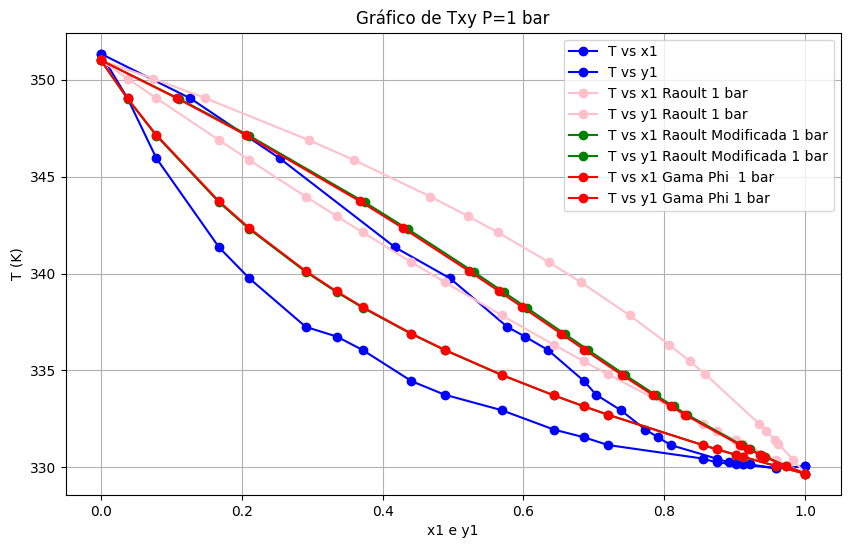

In [102]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(x1,T, label='T vs x1', color='blue', marker='o')
plt.plot(y1,T, label='T vs y1', color='blue', marker='o')
plt.plot(x1,T_raoult_1bar, label='T vs x1 Raoult 1 bar', color='pink', marker='o')
plt.plot(y1_raoult_1bar, T_raoult_1bar, label='T vs y1 Raoult 1 bar', color='pink', marker='o')
plt.plot(x1,T_raoult_modificada_1bar, label='T vs x1 Raoult Modificada 1 bar', color='green', marker='o')
plt.plot(y1_raoult_modificada_1bar, T_raoult_modificada_1bar, label='T vs y1 Raoult Modificada 1 bar', color='green', marker='o')
plt.plot(x1,T_gama_phi_1bar, label='T vs x1 Gama Phi  1 bar', color='red', marker='o')
plt.plot(y1_gama_phi_1bar,T_gama_phi_1bar, label='T vs y1 Gama Phi 1 bar', color='red', marker='o')

# Configurando os eixos
plt.xlabel('x1 e y1')
plt.ylabel('T (K)')
plt.title('Gráfico de Txy P=1 bar')
plt.legend()
plt.grid()

# Exibindo o gráfico
plt.show()

## P = 3 bar

In [103]:
x1 = [0.000, 0.018, 0.058, 0.141, 0.168, 0.225, 0.254, 0.291, 0.320, 0.465, 0.496, 0.536, 0.627, 0.703, 0.892, 0.950, 0.979, 1.000]

In [104]:
y1=[0,0.064,0.162,0.313,0.350,0.418,0.449,0.481,0.512,0.610,0.635,0.652,0.703,0.756,0.892,0.940,0.969,1]

In [105]:
T=[382.05,380.65,378.65,375.15,374.15,372.35,371.45,370.45,370.35,367.75,367.45,366.95,365.65,365.05,364.15,364.45,364.55,365.25]

In [106]:
P=300#kPa

In [107]:
y1_raoult_3bar= raoult(x1,P)[1]
print(y1_raoult_3bar)

[0.0, 0.027210958862527543, 0.086303204160707, 0.20293845673455205, 0.23916619633104352, 0.3129365499345936, 0.34907726110069326, 0.39384818643335123, 0.42790358034481574, 0.5849942839927279, 0.6158306193647175, 0.6542480815846116, 0.7360873694078338, 0.7987897733828258, 0.9343317703704038, 0.970588084038946, 0.9878494271428987, 0.9999999999999998]


In [108]:
T_raoult_3bar= raoult(x1,P)[0]
print(T_raoult_3bar)

[381.328145212958, 381.0428548567563, 380.40637096557293, 379.0757909792817, 378.6404437720786, 377.71800778176987, 377.2471851481057, 376.64525973625933, 376.17268276387745, 373.80396048172423, 373.29726008683735, 372.6438353945465, 371.1605221541473, 369.92728700447174, 366.8959394428135, 365.9790224136391, 365.5233446438948, 365.1945918593392]


In [109]:
y1_raoult_modificada_3bar= Raoul_modificada(x1, P, a, b_12, b_21,R)[1]
print(y1_raoult_modificada_3bar)

[0.0, 0.0411529277071988, 0.12369713693310437, 0.2638973685130352, 0.30245591837828445, 0.3752015650354965, 0.40844219789323316, 0.4478159127366905, 0.4766274394781258, 0.6012254132969199, 0.6249085720419161, 0.6544844724888573, 0.7190502671919499, 0.7717927399570734, 0.9092304174200249, 0.9562850822778279, 0.9812309965408759, 0.9999999999999998]


In [110]:
T_raoult_modificada_3bar= Raoul_modificada(x1, P, a, b_12, b_21, R)[0]
print(T_raoult_modificada_3bar)

[381.3281452129622, 380.6025078613634, 379.10769786282583, 376.45489523382247, 375.7035974723042, 374.2685384547074, 373.60836127081745, 372.82633894699035, 372.2562763253692, 369.86690455790864, 369.43817725585194, 368.9201517058933, 367.8724781870512, 367.1204340475581, 365.69397288428206, 365.3924343012201, 365.2700965224436, 365.1945918593392]


In [111]:
y1_gama_phi_3bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[1]
print(y1_gama_phi_3bar)

[0.0, 0.03977951369521842, 0.11994223196839748, 0.25724711086463187, 0.2952622352333342, 0.3672747246186159, 0.4003052099557692, 0.43952897872565283, 0.46829743097198917, 0.5933289753338804, 0.6172035634343633, 0.6470655546054578, 0.7124350008936616, 0.7660168067578754, 0.9064719938857915, 0.9548713768344607, 0.9806036592881459, 0.9999999999999998]


In [112]:
T_gama_phi_3bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[0]
print(T_gama_phi_3bar)

[381.3281452129622, 380.5986301908152, 379.0932518915523, 376.4137742488484, 375.65331511663163, 374.1992382353756, 373.5298171742065, 372.7366324934168, 372.15840914739437, 369.73782917879663, 369.30479815885565, 368.7826029125994, 367.731839313902, 366.9851100254547, 365.61605937992937, 365.35074723546467, 365.2512439048154, 365.1945918593392]


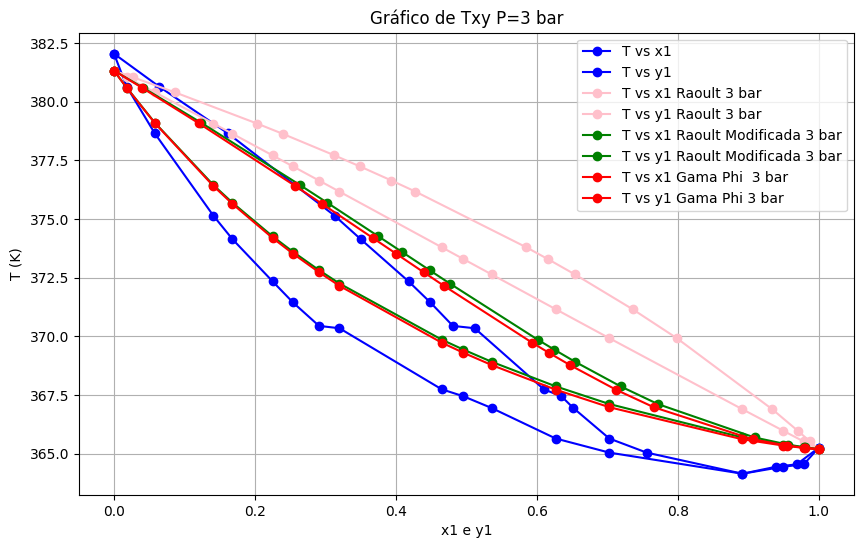

In [113]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(x1,T, label='T vs x1', color='blue', marker='o')
plt.plot(y1,T, label='T vs y1', color='blue', marker='o')
plt.plot(x1,T_raoult_3bar, label='T vs x1 Raoult 3 bar', color='pink', marker='o')
plt.plot(y1_raoult_3bar, T_raoult_3bar, label='T vs y1 Raoult 3 bar', color='pink', marker='o')
plt.plot(x1,T_raoult_modificada_3bar, label='T vs x1 Raoult Modificada 3 bar', color='green', marker='o')
plt.plot(y1_raoult_modificada_3bar, T_raoult_modificada_3bar, label='T vs y1 Raoult Modificada 3 bar', color='green', marker='o')
plt.plot(x1,T_gama_phi_3bar, label='T vs x1 Gama Phi  3 bar', color='red', marker='o')
plt.plot(y1_gama_phi_3bar,T_gama_phi_3bar, label='T vs y1 Gama Phi 3 bar', color='red', marker='o')

# Configurando os eixos
plt.xlabel('x1 e y1')
plt.ylabel('T (K)')
plt.title('Gráfico de Txy P=3 bar')
plt.legend()
plt.grid()

# Exibindo o gráfico
plt.show()

## P = 7 bar

In [114]:
x1=[0.000, 0.031, 0.045, 0.092, 0.113, 0.141, 0.197, 0.232, 0.298, 0.388, 0.504, 0.561, 0.686, 0.809, 0.911, 0.989, 1.000]

In [115]:
y1=[0.000,0.052,0.092,0.168,0.204,0.247,0.312,0.350,0.410,0.481,0.577,0.618,0.703,0.791,0.892,0.979,1.000]

In [116]:
T = [410.75,410.05,409.05,407.65,407.15,406.35,404.55,404.05,402.95,401.65,399.95,399.35,398.25,398.25,398.65,399.15,399.35]

In [117]:
P=700#kPa

In [118]:
y1_raoult_7bar= raoult(x1,P)[1]
print(y1_raoult_7bar)

[0.0, 0.03793599329479161, 0.0549339673339009, 0.11138084419123885, 0.13629144461656922, 0.16920447043904174, 0.2339874435375179, 0.27376256193136433, 0.34725107015439255, 0.44421900223701943, 0.5635685825308165, 0.6198524030102674, 0.7377529081826357, 0.8462792218362527, 0.9306106733230869, 0.9916348899805896, 1.0000000000000007]


In [119]:
T_raoult_7bar= raoult(x1,P)[0]
print(T_raoult_7bar)

[409.1022606660655, 408.84767370271993, 408.73179923405735, 408.33868436826765, 408.16098619799243, 407.9220797789909, 407.43748039785214, 407.130004155895, 406.5405567434398, 405.7165116780869, 404.6202016942701, 404.0675619694807, 402.8242019821942, 401.55996887863853, 400.4824313746967, 399.641592254818, 399.5218876740529]


In [120]:
y1_raoult_modificada_7bar= Raoul_modificada(x1, P, a, b_12, b_21,R)[1]
print(y1_raoult_modificada_7bar)

[0.0, 0.055079592549607495, 0.07846205358253532, 0.15100923734197755, 0.18078752385370386, 0.21828504779813493, 0.2867519318328324, 0.3258129704281065, 0.39324981024753464, 0.47535913374124056, 0.570641519383937, 0.6151243255897884, 0.7118371744649518, 0.8120856264495254, 0.9053274267668571, 0.9873981641927608, 1.0000000000000007]


In [121]:
T_raoult_modificada_7bar= Raoul_modificada(x1, P, a, b_12, b_21, R)[0]
print(T_raoult_modificada_7bar)

[409.10226066606543, 408.1981373186837, 407.812499522927, 406.6129770785777, 406.12107167416104, 405.5040555320345, 404.39160440182434, 403.7706046241194, 402.7358890450753, 401.57234422245944, 400.4227432950476, 399.983728372912, 399.29128061052876, 398.9898927434189, 399.08811421642116, 399.44665275227214, 399.5218876740529]


In [122]:
y1_gama_phi_7bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[1]
print(y1_gama_phi_7bar)

[0.0, 0.05359828757391088, 0.07640986425561544, 0.14740294309846305, 0.17663702426318537, 0.21352526644897304, 0.2810926287544916, 0.3197597583805029, 0.3867111142913557, 0.46854401645564636, 0.5639123177598923, 0.6085810173513394, 0.706032114912814, 0.807594861770128, 0.9026810823553847, 0.9869944568378476, 1.0000000000000357]


In [123]:
T_gama_phi_7bar= bolhaT_gama_phi(x1, P, Tc_1, Pc_1, w_1, Zc_1, Vc_1, Tc_2, Pc_2, w_2, Zc_2, Vc_2, a, b_12, b_21)[0]
print(T_gama_phi_7bar)

[409.10226066606543, 408.1412678150685, 407.73129253163455, 406.4559678973422, 405.9330358000988, 405.27727384085455, 404.09593739201495, 403.437432913757, 402.34293092009045, 401.1195876633636, 399.9284209277063, 399.4839609453625, 398.81880749319873, 398.6119015045051, 398.86445915960974, 399.4130125390325, 399.5218876740547]


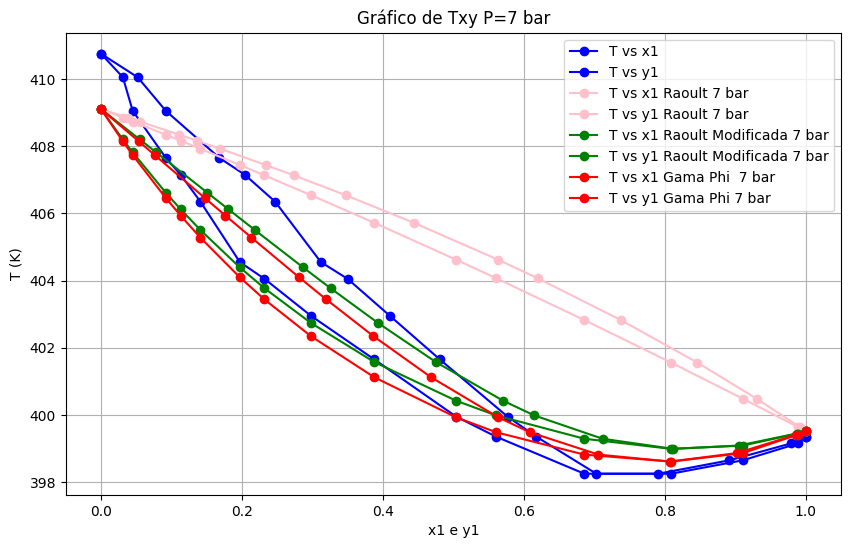

In [124]:
# Criando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(x1,T, label='T vs x1', color='blue', marker='o')
plt.plot(y1,T, label='T vs y1', color='blue', marker='o')
plt.plot(x1,T_raoult_7bar, label='T vs x1 Raoult 7 bar', color='pink', marker='o')
plt.plot(y1_raoult_7bar, T_raoult_7bar, label='T vs y1 Raoult 7 bar', color='pink', marker='o')
plt.plot(x1,T_raoult_modificada_7bar, label='T vs x1 Raoult Modificada 7 bar', color='green', marker='o')
plt.plot(y1_raoult_modificada_7bar, T_raoult_modificada_7bar, label='T vs y1 Raoult Modificada 7 bar', color='green', marker='o')
plt.plot(x1,T_gama_phi_7bar, label='T vs x1 Gama Phi  7 bar', color='red', marker='o')
plt.plot(y1_gama_phi_7bar,T_gama_phi_7bar, label='T vs y1 Gama Phi 7 bar', color='red', marker='o')

# Configurando os eixos
plt.xlabel('x1 e y1')
plt.ylabel('T (K)')
plt.title('Gráfico de Txy P=7 bar')
plt.legend()
plt.grid()

# Exibindo o gráfico
plt.show()